In [291]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [292]:
df= pd.read_csv('train.csv')
test_df= pd.read_csv('test.csv')
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [293]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


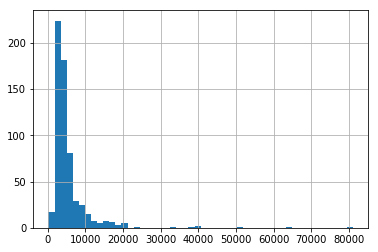

In [294]:
df['ApplicantIncome'].hist(bins= 50)
#more Applicant Income is < 10000

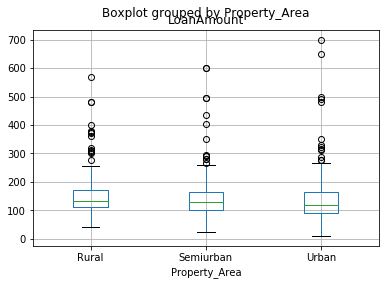

In [295]:
df.boxplot(column= 'LoanAmount', by = 'Property_Area')
# more LoanAount Outliers in Urban Areas

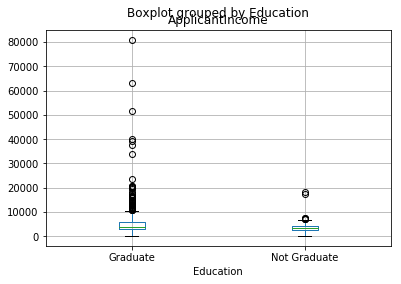

In [296]:
df.boxplot(column= 'ApplicantIncome' ,by= 'Education')
# More Outliers come in Graduates

In [297]:
#Check For Missing Values in Dataset
df.apply(lambda x: sum(x.isnull()), axis= 0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [298]:
#train data
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace= True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace= True)
df['Married'].fillna('Yes',inplace= True)
df['Credit_History'].fillna(1.0,inplace= True)
df['Self_Employed'].fillna('No',inplace= True)
df['Gender'].fillna('Male',inplace= True)
df['Dependents'].fillna('0',inplace= True)

#Test data
test_df['LoanAmount'].fillna(test_df['LoanAmount'].mean(), inplace= True)
test_df['Loan_Amount_Term'].fillna(test_df['Loan_Amount_Term'].mean(),inplace= True)
test_df['Married'].fillna('Yes',inplace= True)
test_df['Credit_History'].fillna(1.0,inplace= True)
test_df['Self_Employed'].fillna('No',inplace= True)
test_df['Gender'].fillna('Male',inplace= True)
test_df['Dependents'].fillna('0',inplace= True)

#df['Self_Employed'].value_counts()
#  meanLA= np.mean(df.LoanAmount)
#df.LoanAmount= df.LoanAmount.fillna(meanLA)
# as either there average is wriiten or mode(if it is greater than 60%)


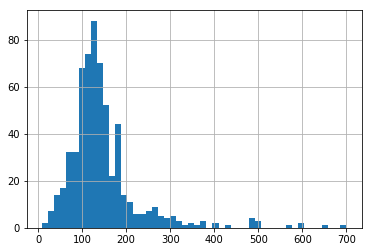

In [299]:
df['LoanAmount'].hist(bins= 50)

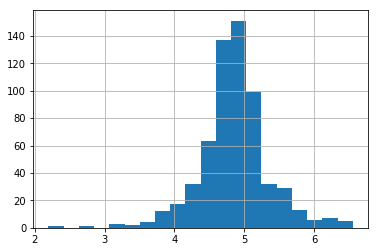

In [300]:
# Dealing with Outliers 
df['LoanAmount_log']= np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins= 20)

# Test data
test_df['LoanAmount_log']= np.log(test_df['LoanAmount'])
# distribution looke much closer to normal effect of extreme values significantly dropped

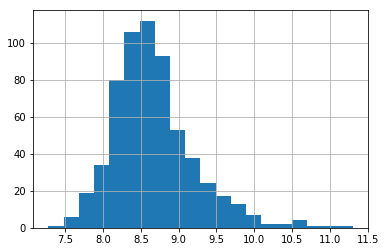

In [301]:
df['TotalIncome']= df['ApplicantIncome']+ df['CoapplicantIncome']
df['TotalIncome_log']= np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins= 20)

# test
test_df['TotalIncome']= test_df['ApplicantIncome']+ test_df['CoapplicantIncome']
test_df['TotalIncome_log']= np.log(test_df['TotalIncome'])

In [302]:
test_df= test_df.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','TotalIncome'],axis=1)
df= df.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','TotalIncome'],axis=1)


In [303]:
#df['Dependents'].value_counts()
df.apply(lambda x: sum(x.isnull()), axis= 0)

Loan_ID             0
Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
LoanAmount_log      0
TotalIncome_log     0
dtype: int64

In [304]:
df.dtypes

Loan_ID              object
Gender               object
Married              object
Dependents           object
Education            object
Self_Employed        object
Loan_Amount_Term    float64
Credit_History      float64
Property_Area        object
Loan_Status          object
LoanAmount_log      float64
TotalIncome_log     float64
dtype: object

In [305]:
# Making all of them as int64
#df.describe()
#df['CoapplicantIncome']= df['CoapplicantIncome'].astype(np.int64)
#df['LoanAmount']= df['LoanAmount'].astype(np.int64)
df['Loan_Amount_Term']= df['Loan_Amount_Term'].astype(np.int64)
df['Credit_History']= df['Credit_History'].astype(np.int64)
df['LoanAmount_log']= df['LoanAmount_log'].astype(np.int64)
#df['TotalIncome']= df['TotalIncome'].astype(np.int64)
df['TotalIncome_log']= df['TotalIncome_log'].astype(np.int64)

#test data
# Making all of them as int64

#test_df['CoapplicantIncome']= test_df['CoapplicantIncome'].astype(np.int64)
#test_df['LoanAmount']= test_df['LoanAmount'].astype(np.int64)
test_df['Loan_Amount_Term']= test_df['Loan_Amount_Term'].astype(np.int64)
test_df['Credit_History']= test_df['Credit_History'].astype(np.int64)
test_df['LoanAmount_log']= test_df['LoanAmount_log'].astype(np.int64)
#test_df['TotalIncome']= test_df['TotalIncome'].astype(np.int64)
test_df['TotalIncome_log']= test_df['TotalIncome_log'].astype(np.int64)
df.dtypes

Loan_ID             object
Gender              object
Married             object
Dependents          object
Education           object
Self_Employed       object
Loan_Amount_Term     int64
Credit_History       int64
Property_Area       object
Loan_Status         object
LoanAmount_log       int64
TotalIncome_log      int64
dtype: object

In [306]:
from sklearn.preprocessing import LabelEncoder

var= ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le= LabelEncoder() # Object
for i in var:
    df[i]= le.fit_transform(df[i])
    if (i!='Loan_Status'):
        test_df[i]= le.fit_transform(test_df[i])


In [307]:
#make Loan Status the end
df['result']= df['Loan_Status']
df= df.drop(['Loan_Status'],axis= 1)


In [308]:
X= df.iloc[:,1:-1].values
y= df.iloc[:,-1].values

#Split the data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size= 0.3,random_state= 5)


In [309]:
# fit model
from sklearn.ensemble import RandomForestClassifier 
classifier= RandomForestClassifier(n_estimators= 700)
classifier.fit(X_train,y_train)
pred= classifier.predict(X_test)

In [310]:
from sklearn import metrics as m
# Accuracy
acc= m.accuracy_score(y_test,pred)
acc

0.7837837837837838

In [311]:
# For solution
X_t = test_df.iloc[:,1:].values
#pre= classifier.predict(X_t)
X_t.shape
pre= classifier.predict(X_t)
#test_df['Loan_Status']= predict.astype(np.int64)
#test_df['Loan_Status']=test_df['Loan_Status'].map({0:'N',1:'Y'})
#test_df.to_csv('submission.csv',index= false)

In [312]:
test_df['Loan_Status']= pre

In [313]:
test_df['Loan_Status']= test_df['Loan_Status'].map({0:'N',1:'Y'})


In [314]:
test_df= test_df.drop(['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area','LoanAmount_log','TotalIncome_log'],axis=1)


In [315]:
test_df.to_csv('sample_submission.csv',index= False)